# Data Scraping and Data Visualization for the List of Largest Companies in the United States

<mark>This project aims to determine which industry type has the highest revenue and which city has the largest number of employees at the headquarters</mark>

### Import Library

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Web Scrapping

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
table = soup.find_all('table')[1]
title = table.find_all('th')
z = [i.text.strip() for i in title]

df = pd.DataFrame(columns = z)

In [3]:
data = table.find_all('tr')
for row in data[1:]:
    row_data = row.find_all('td')
    individual_data = [p.text.strip() for p in row_data]

    length = len(df)
    df.loc[length] = individual_data

In [5]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    float64
 4   Revenue growth          100 non-null    object 
 5   Employees               100 non-null    float64
 6   Headquarters            100 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.2+ KB


### Data Visualization

#### Top 10 industry by revenue

In [19]:
grouped_df = df.groupby("Industry")
summ = grouped_df[['Revenue (USD millions)']].sum()
srt = summ.sort_values(by="Revenue (USD millions)", ascending= False).head(10)

<Axes: title={'center': 'Top 10 Industry by Revenue'}, xlabel='Industry', ylabel='Revenue'>

<Figure size 640x480 with 0 Axes>

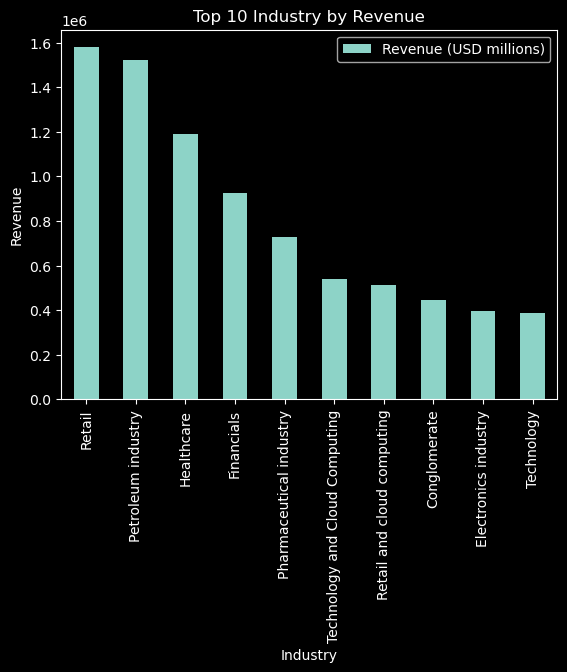

In [20]:
plt.style.use('dark_background')
plt.tight_layout()
srt.plot(kind = 'bar',title = 'Top 10 Industry by Revenue', xlabel = 'Industry', ylabel = 'Revenue')

#### Top 10 total employees in headquarters by city and state

In [12]:
grouped_df2 = df.groupby("Headquarters")
summ2 = grouped_df2[['Employees']].sum()
srt2 = summ2.sort_values(by="Employees", ascending= False).head(10)

<Axes: title={'center': 'Top 10 City,State by Total Employees'}, xlabel='City, State', ylabel='Total Employees'>

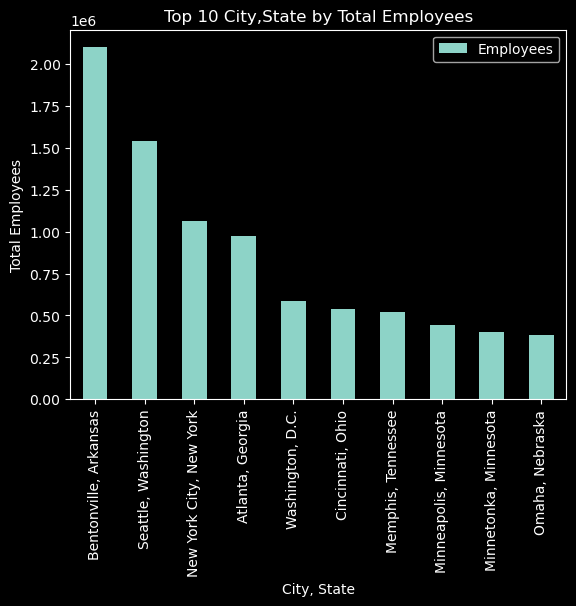

In [14]:
srt2.plot(kind = 'bar',title = 'Top 10 City,State by Total Employees', xlabel = 'City, State', ylabel = 'Total Employees')